# Notebook Week 2
### ML--> DL Model Sequential
### Layer type Dense
### Optimizers Adam SGD

In [1]:
# Imports
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

#### Kind of configuration of the whole noteboook, to play with variables and see with multiple datasets

In [2]:
# Variables to make shifting to different datasets faster
data_set_file = 'charges_insurance.csv' # filename
three_column = True # to run csv with three column
learn_rate = 0.8
x_input = '' # x input declared 
if three_column:
    x2_input = '' # x3 input for multiple plot
y_output = '' # y output declared
y_predict = '' # y predict declared
column_name_x = 'bmi' # column to use as x_input
if three_column:
    column_name_x2 = 'age' # column to use as x2_input
column_name_y = 'charges' # column to use as y_input

In [3]:
# openning dataset file
data_frame = pd.read_csv('./'+data_set_file)
data_frame.head
data_frame.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
x_input = data_frame[[column_name_x]].values  # taking age as X
x2_input = data_frame[[column_name_x2]].values  # taking age as X2
y_input = data_frame[[column_name_y]].values # taking charges as Y
print(x_input.shape)
print(x2_input.shape)
print(y_input.shape)
print(type(y_input)) # just verifying numpy array present

(1338, 1)
(1338, 1)
(1338, 1)
<class 'numpy.ndarray'>


### 3D view to see any data correlation

In [27]:
if three_column:
    px.scatter_3d(data_frame, x=column_name_x,y=column_name_x2, z=column_name_y, opacity=0.5).show()

### Creating deep learning model

In [6]:
# model Type is sequential
model_1 = Sequential()
model_1.add(Dense(1,input_shape=(1,)))
if three_column:
    model_2 = Sequential()
    model_2.add(Dense(1,input_shape=(1,)))
    
    

In [7]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [8]:
if three_column:
    model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [9]:
# choosing the optimizer and error function
# An optimizer is one of the two arguments required for compiling a Keras model
model_1.compile(Adam(learning_rate=learn_rate), 'mean_squared_error')
if three_column:
    model_2.compile(Adam(learning_rate=learn_rate), 'mean_squared_error')

# Now we Train

In [10]:
# we execute fit to train model
model_1.fit(x_input, y_input, epochs=100)

Epoch 1/100
42/42 [==============================] - 1s 3ms/step - loss: 310159616.0000
Epoch 2/100
42/42 [==============================] - 0s 3ms/step - loss: 284119264.0000
Epoch 3/100
42/42 [==============================] - 0s 3ms/step - loss: 261125184.0000
Epoch 4/100
42/42 [==============================] - 0s 3ms/step - loss: 241220720.0000
Epoch 5/100
42/42 [==============================] - 0s 3ms/step - loss: 224111760.0000
Epoch 6/100
42/42 [==============================] - 0s 3ms/step - loss: 209155008.0000
Epoch 7/100
42/42 [==============================] - 0s 3ms/step - loss: 196675968.0000
Epoch 8/100
42/42 [==============================] - 0s 3ms/step - loss: 185942544.0000
Epoch 9/100
42/42 [==============================] - 0s 3ms/step - loss: 177008976.0000
Epoch 10/100
42/42 [==============================] - 0s 3ms/step - loss: 169582720.0000
Epoch 11/100
42/42 [==============================] - 0s 3ms/step - loss: 163388928.0000
Epoch 12/100
42/42 [==========

In [11]:
if three_column:
    model_2.fit(x2_input, y_input, epochs=100)

Epoch 1/100
42/42 [==============================] - 1s 4ms/step - loss: 302816352.0000
Epoch 2/100
42/42 [==============================] - 0s 4ms/step - loss: 268977760.0000
Epoch 3/100
42/42 [==============================] - 0s 3ms/step - loss: 240853616.0000
Epoch 4/100
42/42 [==============================] - 0s 3ms/step - loss: 217519440.0000
Epoch 5/100
42/42 [==============================] - 0s 3ms/step - loss: 198353744.0000
Epoch 6/100
42/42 [==============================] - 0s 3ms/step - loss: 183014176.0000
Epoch 7/100
42/42 [==============================] - 0s 3ms/step - loss: 170645280.0000
Epoch 8/100
42/42 [==============================] - 0s 3ms/step - loss: 161164736.0000
Epoch 9/100
42/42 [==============================] - 0s 3ms/step - loss: 153688784.0000
Epoch 10/100
42/42 [==============================] - 0s 3ms/step - loss: 148134032.0000
Epoch 11/100
42/42 [==============================] - 0s 3ms/step - loss: 144016064.0000
Epoch 12/100
42/42 [==========

In [12]:
y_predict = model_1(x_input)
y_predict

<tf.Tensor: shape=(1338, 1), dtype=float32, numpy=
array([[12100.587 ],
       [14552.243 ],
       [14230.6455],
       ...,
       [15838.631 ],
       [11223.504 ],
       [12589.247 ]], dtype=float32)>

In [13]:
if three_column:
    y_predict2 = model_1(x2_input)
    y_predict2

In [14]:
y_input

array([[16884.924 ],
       [ 1725.5523],
       [ 4449.462 ],
       ...,
       [ 1629.8335],
       [ 2007.945 ],
       [29141.3603]])

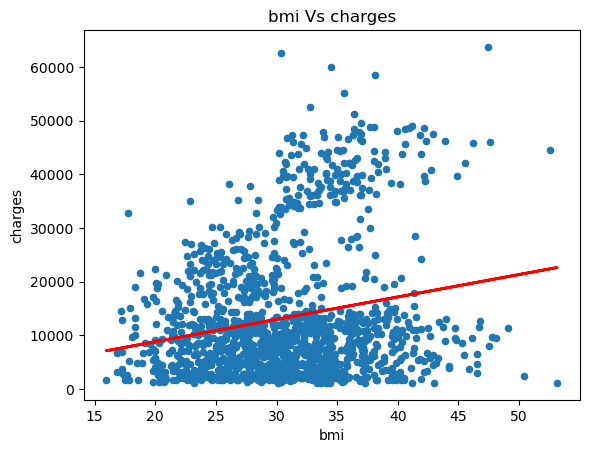

In [15]:
data_frame.plot(kind='scatter',
       x=column_name_x,
       y=column_name_y,
       title=column_name_x+" Vs "+column_name_y)
plt.plot(x_input,y_predict, color='red', linewidth=2)



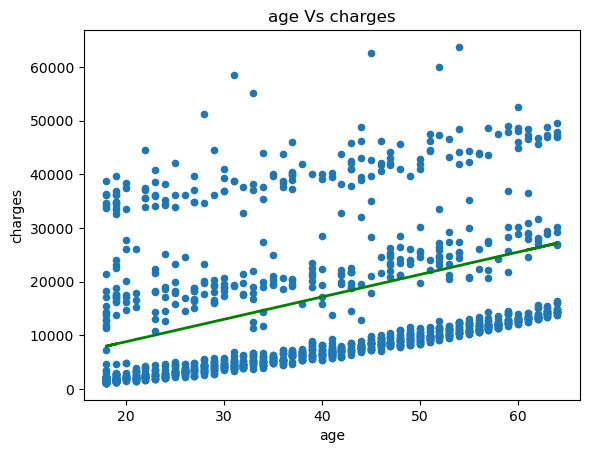

In [16]:
if three_column:
       data_frame.plot(kind='scatter',
              x=column_name_x2,
              y=column_name_y,
              title=column_name_x2+" Vs "+column_name_y)
       plt.plot(x2_input,y_predict2, color='green', linewidth=2)


### Attempting to train with Two VAriables

In [17]:
if three_column:
    cmb = np.concatenate((x_input, x2_input), axis=1)
    cmb

In [18]:
if three_column:
    print(cmb.shape)

(1338, 2)


In [19]:
np.array([73.84701702,54545454]).shape

(2,)

In [20]:
if three_column:
    model_charges_cmb = Sequential()
    model_charges_cmb.add(Dense(1,input_shape=(2,), activation='linear'))

In [21]:
if three_column:
    model_charges_cmb.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [22]:
if three_column:
    model_charges_cmb.compile(Adam(learning_rate=learn_rate), 'mean_squared_error')
#model_charges_cmb.compile(loss='mse', optimizer='rmsprop', metrics=['mse'])

In [23]:
if three_column:
    model_charges_cmb.fit(cmb, y_input, epochs=100)

Epoch 1/100
42/42 [==============================] - 1s 3ms/step - loss: 293360736.0000
Epoch 2/100
42/42 [==============================] - 0s 3ms/step - loss: 240621088.0000
Epoch 3/100
42/42 [==============================] - 0s 3ms/step - loss: 202537728.0000
Epoch 4/100
42/42 [==============================] - 0s 3ms/step - loss: 175604320.0000
Epoch 5/100
42/42 [==============================] - 0s 3ms/step - loss: 157903088.0000
Epoch 6/100
42/42 [==============================] - 0s 3ms/step - loss: 146285696.0000
Epoch 7/100
42/42 [==============================] - 0s 3ms/step - loss: 139393952.0000
Epoch 8/100
42/42 [==============================] - 0s 3ms/step - loss: 135263984.0000
Epoch 9/100
42/42 [==============================] - 0s 3ms/step - loss: 133000560.0000
Epoch 10/100
42/42 [==============================] - 0s 3ms/step - loss: 131849784.0000
Epoch 11/100
42/42 [==============================] - 0s 3ms/step - loss: 131281624.0000
Epoch 12/100
42/42 [==========

In [24]:
if three_column:
    charges_predict_cmb = model_charges_cmb(cmb)
    charges_predict_cmb

In [25]:
y_input

array([[16884.924 ],
       [ 1725.5523],
       [ 4449.462 ],
       ...,
       [ 1629.8335],
       [ 2007.945 ],
       [29141.3603]])